CAPSTONE PROJECT-4 :- PRCP-1023-JohnsHopkinsCovid19
PROJECT TEAM ID :- PTID-CDS-NOV-23-1680

Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.
Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a
predictive model to forecast the Covid19 cases based on past cases for a
specific country or region.
Task3:- Make suggestions to the government health department of the
country/region for preparation based on your predictions.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math 
import time
import wget
import altair as alt
import plotly.express as px

from matplotlib import style
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
Confirmed_filepath = pd.read_csv("time_series_covid19_confirmed_global.csv")
Death_filepath= pd.read_csv("time_series_covid19_deaths_global.csv")
Recovered_filepath= pd.read_csv("time_series_covid19_recovered_global.csv")

In [3]:
def Import_COVIDData(Confirmed_filepath):
        data = Confirmed_filepath
        data = pd.read_csv("time_series_covid19_confirmed_global.csv")
        data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
        return data  

In [4]:
def Import_COVIDData(Confirmed_filepath):
        data = Confirmed_filepath
        data = pd.read_csv("time_series_covid19_confirmed_global.csv")
        data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
        return data  

Here we used melt to convert all rows to columns

In [5]:
def transform_COVIDData(data):
        data = pd.melt(
        frame = data,
        id_vars = ['Province','Country','Lat','Long','Status'],
        var_name = 'Date',
        value_name = 'Count'
    )
        return data

In [6]:
ConfirmedCases = Import_COVIDData(Confirmed_filepath)
ConfirmedCases['Status'] = 'Confirmed'
ConfirmedCases = transform_COVIDData(ConfirmedCases)

In [7]:
ConfirmedCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,Confirmed,9/21/20,36151
64900,NaN,Western Sahara,24.215500,-12.885800,Confirmed,9/21/20,10
64901,NaN,Yemen,15.552727,48.516388,Confirmed,9/21/20,2028
64902,NaN,Zambia,-13.133897,27.849332,Confirmed,9/21/20,14175


In [8]:
def Import_COVIDData(Death_filepath):
        data = Death_filepath
        data = pd.read_csv("time_series_covid19_deaths_global.csv")
        data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
        return data  

In [9]:
def transform_COVIDData(data):
        data = pd.melt(
        frame = data,
        id_vars = ['Province','Country','Lat','Long','Status'],
        var_name = 'Date',
        value_name = 'Count'
    )
        return data

In [10]:
DeathCases = Import_COVIDData(Death_filepath)
DeathCases['Status'] = 'Dealth'
DeathCases = transform_COVIDData(DeathCases)

In [11]:
DeathCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Dealth,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Dealth,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Dealth,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Dealth,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Dealth,1/22/20,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,Dealth,9/21/20,265
64900,NaN,Western Sahara,24.215500,-12.885800,Dealth,9/21/20,1
64901,NaN,Yemen,15.552727,48.516388,Dealth,9/21/20,586
64902,NaN,Zambia,-13.133897,27.849332,Dealth,9/21/20,331


In [12]:
def Import_COVIDData(Recovered_filepath):
        data = Recovered_filepath
        data = pd.read_csv("time_series_covid19_recovered_global.csv")
        data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
        return data 

In [13]:
def transform_COVIDData(data):
        data = pd.melt(
        frame = data,
        id_vars = ['Province','Country','Lat','Long','Status'],
        var_name = 'Date',
        value_name = 'Count'
    )
        return data

In [14]:
RecoveredCases = Import_COVIDData(Recovered_filepath)
RecoveredCases['Status'] = 'Recovered'
RecoveredCases = transform_COVIDData(RecoveredCases)

In [15]:
RecoveredCases

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Recovered,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Recovered,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Recovered,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Recovered,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Recovered,1/22/20,0
...,...,...,...,...,...,...,...
61727,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,9/21/20,24428
61728,NaN,Western Sahara,24.215500,-12.885800,Recovered,9/21/20,8
61729,NaN,Yemen,15.552727,48.516388,Recovered,9/21/20,1235
61730,NaN,Zambia,-13.133897,27.849332,Recovered,9/21/20,13629


Merge all 3 data in 1 dataframe for merge we are using concat

In [16]:
Totaldata = pd.concat([ConfirmedCases,DeathCases,RecoveredCases])
Totaldata

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
...,...,...,...,...,...,...,...
61727,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,9/21/20,24428
61728,NaN,Western Sahara,24.215500,-12.885800,Recovered,9/21/20,8
61729,NaN,Yemen,15.552727,48.516388,Recovered,9/21/20,1235
61730,NaN,Zambia,-13.133897,27.849332,Recovered,9/21/20,13629


Domain Analysis 
This is a daily updating version of COVID-19 Data Repository by the Center for Systems
Science and Engineering (CSSE) at Johns Hopkins University (JHU). The data updates
every day at 6am UTC, which updates just after the raw JHU data typically updates.
making it available in both a raw form (files with the prefix RAW) and convenient
form (files prefixed with CONVENIENT).
The data covers:
● confirmed cases and deaths on a country level
● confirmed cases and deaths by US county
● some metadata thats available in the raw JHU data

The RAW version is exactly as its distributed in the original dataset.
The CONVENIENT version is aiming to be easier to analyze. The data is organized by
column rather than by row. The metadata is stripped out into a separate file. And it
converted to daily change rather than cumulative totals.
I have a notebook that updates just after each data dump updates, giving a brief
overview of the latest data. Its also a useful reference if you want to see how to read
the CONVENIENT data into a pandas DataFrame.

In [17]:
Totaldata.dtypes

Province     object
Country      object
Lat         float64
Long        float64
Status       object
Date         object
Count         int64
dtype: object

we converded Date in datetime format and store it into an index

In [18]:
Totaldata['Date'] = pd.to_datetime(Totaldata['Date'])
Totaldata.set_index('Date',inplace= True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11892\2729546898.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Totaldata['Date'] = pd.to_datetime(Totaldata['Date'])


In [19]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,NaN,Yemen,15.552727,48.516388,Recovered,1235


Basic check

In [20]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191540 entries, 2020-01-22 to 2020-09-21
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  55876 non-null   object 
 1   Country   191540 non-null  object 
 2   Lat       191540 non-null  float64
 3   Long      191540 non-null  float64
 4   Status    191540 non-null  object 
 5   Count     191540 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ MB


In [21]:
Totaldata.shape

(191540, 6)

In [22]:
Totaldata.size

1149240

In [23]:
Totaldata.isnull().sum()

Province    135664
Country          0
Lat              0
Long             0
Status           0
Count            0
dtype: int64

In [24]:
Totaldata.head()

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.93911,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.15330,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.03390,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.50630,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.20270,17.873900,Confirmed,0


In [25]:
Totaldata.tail()

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,NaN,Yemen,15.552727,48.516388,Recovered,1235
2020-09-21,NaN,Zambia,-13.133897,27.849332,Recovered,13629
2020-09-21,NaN,Zimbabwe,-19.015438,29.154857,Recovered,5924


In [26]:
Totaldata.describe()

,Lat,Long,Count
count,191540.000000,191540.000000,1.915400e+05
mean,20.676502,24.494931,1.836390e+04
std,24.735871,69.200810,1.730923e+05
min,-51.796300,-135.000000,0.000000e+00
25%,6.611100,-12.885800,1.000000e+00
50%,22.166700,21.745300,5.800000e+01
75%,40.182400,80.771797,1.049000e+03
max,71.706900,178.065000,6.856884e+06


In [27]:
Totaldata.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,191540.0,20.676502,24.735871,-51.7963,6.6111,22.1667,40.182400,7.170690e+01
Long,191540.0,24.494931,69.200810,-135.0000,-12.8858,21.7453,80.771797,1.780650e+02
Count,191540.0,18363.901911,173092.273201,0.0000,1.0000,58.0000,1049.000000,6.856884e+06


To get latest covid cases base on date

In [28]:
date =Totaldata.index[-1] #latest date
TotaldataConfirmed = Totaldata[(Totaldata['Status'] == 'Confirmed') & (Totaldata.index == date)]
TotaldataRecovered = Totaldata[(Totaldata['Status'] == 'Recovered') & (Totaldata.index == date)]
TotaldataDealth = Totaldata[(Totaldata['Status'] == 'Dealth') & (Totaldata.index == date)]

To get latest covid cases base on second date

In [29]:
dt = list(set(Totaldata.index))  #set is using for removing dublicates value
dt.sort()
date =dt[-2] #second last date
TotaldataConfirmed_1dayMinus = Totaldata[(Totaldata['Status'] == 'Confirmed') & (Totaldata.index == date)]
TotaldataRecovered_1dayMinus = Totaldata[(Totaldata['Status'] == 'Recovered') & (Totaldata.index == date)]
TotaldataDealth_1dayMinus = Totaldata[(Totaldata['Status'] == 'Dealth') & (Totaldata.index == date)]

give total of 3 cases

In [30]:
TotaldataConfirmed['Count'].sum()
TotaldataRecovered['Count'].sum()
TotaldataDealth['Count'].sum()

963693

Build a kpi

In [31]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number+delta",
    title = {'text': "Confirmed"},
    value = TotaldataConfirmed['Count'].sum(),
    delta = {'reference': TotaldataConfirmed_1dayMinus['Count'].sum()},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    title = {'text': "Recovered"},
    value = TotaldataRecovered['Count'].sum(),
    delta = {'reference': TotaldataRecovered_1dayMinus['Count'].sum()},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    title = {'text': "Dealth"},
    number = {'valueformat':'0.2s'},
    value = TotaldataDealth['Count'].sum(),
    delta = {'reference': TotaldataDealth_1dayMinus['Count'].sum()},
    domain = {'row': 1, 'column': 0}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 90}}]
                         }})

Top 10 Countries with recovered cases on the most recent days

In [32]:
def RecentCases_Top10Countries(Status):
    Top10Countries = Totaldata[(Totaldata['Status']==Status) & (Totaldata.index==max(Totaldata[Totaldata['Status']==Status].index))].sort_values(by='Count',ascending = False).head(10)[['Country','Count']]
    return Top10Countries

In [33]:
Top10CountriesRecovered = RecentCases_Top10Countries('Recovered')
Top10CountriesConfirmed = RecentCases_Top10Countries('Confirmed')
Top10CountriesDealth = RecentCases_Top10Countries('Dealth')

In [34]:
Top10CountriesDealth = RecentCases_Top10Countries('Dealth')
def Display_Top10Country(Top10Countries,Status):
    Top10Countries = Top10Countries.reset_index()
    Top10Countries = Top10Countries[['Country','Count']]
    date =max(Totaldata[Totaldata['Status']==Status].index)
    date = date.date()
    print(Status +' cases till:',date)
    return Top10Countries

In [35]:
Top10CountriesRecovered = Display_Top10Country(Top10CountriesRecovered,'Recovered')
Top10CountriesRecovered.style.background_gradient(cmap = 'Oranges')

Recovered cases till: 2020-09-21


,Country,Count
0,India,4396399
1,Brazil,3993432
2,US,2615949
3,Russia,909026
4,Colombia,640900
5,Peru,607837
6,Mexico,596317
7,South Africa,591208
8,Argentina,508563
9,Chile,421111


In [36]:
Top10CountriesConfirmed = Display_Top10Country(Top10CountriesConfirmed,'Confirmed')
Top10CountriesConfirmed.style.background_gradient(cmap = 'Blues')

Confirmed cases till: 2020-09-21


,Country,Count
0,US,6856884
1,India,5487580
2,Brazil,4558040
3,Russia,1105048
4,Colombia,770435
5,Peru,768895
6,Mexico,700580
7,Spain,671468
8,South Africa,661936
9,Argentina,640147


In [37]:
Top10CountriesDealth = Display_Top10Country(Top10CountriesConfirmed,'Dealth')
Top10CountriesDealth.style.background_gradient(cmap = 'Blues')

Dealth cases till: 2020-09-21


,Country,Count
0,US,6856884
1,India,5487580
2,Brazil,4558040
3,Russia,1105048
4,Colombia,770435
5,Peru,768895
6,Mexico,700580
7,Spain,671468
8,South Africa,661936
9,Argentina,640147


In [38]:
date =max(Totaldata[Totaldata['Status']=='Confirmed'].index)
date = date.date()
px.bar(Top10CountriesRecovered,x='Country',y='Count',color='Country',title='Top 10 Recovered cases till '+str(date))

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Bar(x=Top10CountriesRecovered['Country'],y=Top10CountriesRecovered['Count'],text = Top10CountriesRecovered['Count'],name ='Recovered'),
    row=1, col=1
)


fig.add_trace(
    go.Bar(x=Top10CountriesConfirmed['Country'],y=Top10CountriesConfirmed['Count'],text = Top10CountriesConfirmed['Count'],name ='Confirmed'),
    row=2, col=1
)

fig.add_trace(   
    go.Bar(x=Top10CountriesDealth['Country'],y=Top10CountriesDealth['Count'],text = Top10CountriesDealth['Count'],name ='Dealth'),
    row=3, col=1
)


fig.update_layout(height=1400, width=800, title_text="Top 10 Countries as of "+str(date))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [40]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,NaN,Yemen,15.552727,48.516388,Recovered,1235


converted province NAN value to N/A

In [41]:
Totaldata['Province'] = Totaldata['Province'].fillna('N/A')

In [42]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,N/A,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,N/A,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,N/A,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,N/A,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,N/A,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,N/A,West Bank and Gaza,31.952200,35.233200,Recovered,24428
2020-09-21,N/A,Western Sahara,24.215500,-12.885800,Recovered,8
2020-09-21,N/A,Yemen,15.552727,48.516388,Recovered,1235


In [43]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191540 entries, 2020-01-22 to 2020-09-21
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  191540 non-null  object 
 1   Country   191540 non-null  object 
 2   Lat       191540 non-null  float64
 3   Long      191540 non-null  float64
 4   Status    191540 non-null  object 
 5   Count     191540 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ MB


In [44]:
Totaldata.head()

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,N/A,Afghanistan,33.93911,67.709953,Confirmed,0
2020-01-22,N/A,Albania,41.15330,20.168300,Confirmed,0
2020-01-22,N/A,Algeria,28.03390,1.659600,Confirmed,0
2020-01-22,N/A,Andorra,42.50630,1.521800,Confirmed,0
2020-01-22,N/A,Angola,-11.20270,17.873900,Confirmed,0


In [57]:
Totaldata["Province"].value_counts

<bound method IndexOpsMixin.value_counts of Date
2020-01-22    N/A
2020-01-22    N/A
2020-01-22    N/A
2020-01-22    N/A
2020-01-22    N/A
             ... 
2020-09-21    N/A
2020-09-21    N/A
2020-09-21    N/A
2020-09-21    N/A
2020-09-21    N/A
Name: Province, Length: 191540, dtype: object>

In [59]:
Totaldata["Country"].value_counts()

Country
China             24156
United Kingdom     8052
France             8052
Canada             7076
Australia          5856
                  ...  
Greece              732
Grenada             732
Guatemala           732
Guinea              732
Zimbabwe            732
Name: count, Length: 188, dtype: int64

Convert all columns to row

In [45]:
tranformeddata = pd.pivot_table(Totaldata,index=['Province','Country','Lat','Long'],columns='Status',values='Count',aggfunc=np.mean)

In [46]:
tranformeddata.head(2)

,,,Status,Confirmed,Dealth,Recovered
Province,Country,Lat,Long,,,
Alberta,Canada,53.9333,-116.5765,6126.057377,110.983607,NaN
Anguilla,United Kingdom,18.2206,-63.0686,2.168033,0.000000,1.877049


In [47]:
tranformeddata['Recovered'] = tranformeddata['Recovered'].fillna(0)

In [48]:
tranformeddata= tranformeddata.reset_index()
tranformeddata.head()

Status,Province,Country,Lat,Long,Confirmed,Dealth,Recovered
0,Alberta,Canada,53.9333,-116.5765,6126.057377,110.983607,0.000000
1,Anguilla,United Kingdom,18.2206,-63.0686,2.168033,0.000000,1.877049
2,Anhui,China,31.8257,117.2264,934.397541,5.504098,864.459016
3,Aruba,Netherlands,12.5211,-69.9683,433.922131,3.413934,210.147541
4,Australian Capital Territory,Australia,-35.4735,149.0124,79.926230,2.077869,71.397541


In [49]:
tranformeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   272 non-null    object 
 1   Country    272 non-null    object 
 2   Lat        272 non-null    float64
 3   Long       272 non-null    float64
 4   Confirmed  266 non-null    float64
 5   Dealth     266 non-null    float64
 6   Recovered  272 non-null    float64
dtypes: float64(5), object(2)
memory usage: 15.0+ KB


Fill the missing rows

In [50]:
tranformeddata['Confirmed'] = tranformeddata['Confirmed'].fillna(0)
tranformeddata['Dealth'] = tranformeddata['Dealth'].fillna(0)

In [51]:
tranformeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   272 non-null    object 
 1   Country    272 non-null    object 
 2   Lat        272 non-null    float64
 3   Long       272 non-null    float64
 4   Confirmed  272 non-null    float64
 5   Dealth     272 non-null    float64
 6   Recovered  272 non-null    float64
dtypes: float64(5), object(2)
memory usage: 15.0+ KB


In [83]:
from sklearn.preprocessing import LabelEncoder

    # Assuming you have a DataFrame named 'data' with a categorical column 'category'

    # Initialize the LabelEncoder
label_encoder = LabelEncoder()

    # Fit and transform the categorical column
tranformeddata['Country'] = label_encoder.fit_transform(tranformeddata['Country'])

    # Display the encoded column
print(tranformeddata['Country'])

0       32
1      178
2       36
3      122
4        8
      ... 
267      8
268     36
269     32
270     36
271     36
Name: Country, Length: 272, dtype: int32


creting map by the help of folium

Folium- Python's Folium library gives you access to the mapping strengths of the Leaflet JavaScript library through a Python API.

In [52]:
import folium

map = folium.Map(location=[-37.8136,144.9631],zoom_start=4)

for lat,long,value,name,state in zip(tranformeddata['Lat'],tranformeddata['Long'],tranformeddata['Confirmed'],tranformeddata['Country'],tranformeddata['Province']):
    folium.CircleMarker([lat,long],radius=value/100000,popup=('<strong>State</strong>'+str(state).capitalize()+'<br>''<strong>Confirmed Cases</strong>'+str(value)+'<br>'),color='blue',fill_color='crimson',fill_opacity= 0.3).add_to(map)
    

In [53]:
map.save("map1.html")

In [54]:
map

In [91]:
x=tranformeddata.drop("Province",axis=1)
x.head()

Status,Country,Lat,Long,Confirmed,Dealth,Recovered
0,32,53.9333,-116.5765,6126.057377,110.983607,0.000000
1,178,18.2206,-63.0686,2.168033,0.000000,1.877049
2,36,31.8257,117.2264,934.397541,5.504098,864.459016
3,122,12.5211,-69.9683,433.922131,3.413934,210.147541
4,8,-35.4735,149.0124,79.926230,2.077869,71.397541


Scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[1.71122995e-01 8.56087939e-01 5.88488014e-02 2.74757578e-03
  1.28453407e-03 0.00000000e+00]
 [9.51871658e-01 5.66923772e-01 2.29765065e-01 9.72376522e-07
  0.00000000e+00 2.06390958e-06]
 [1.92513369e-01 6.77083671e-01 8.05667833e-01 4.19083252e-04
  6.37049207e-05 9.50515983e-04]
 ...
 [1.71122995e-01 9.39883339e-01 0.00000000e+00 3.87112468e-06
  0.00000000e+00 0.00000000e+00]
 [1.92513369e-01 6.21605756e-01 7.55392650e-01 7.93323219e-05
  2.04443938e-05 1.75986596e-04]
 [1.92513369e-01 6.55687464e-01 8.14825675e-01 5.37273872e-04
  1.01984795e-05 1.21587257e-03]]


Features engineering

In [86]:
data2=tranformeddata.iloc[2:10,2:10]
data2

Status,Lat,Long,Confirmed,Dealth,Recovered
2,31.8257,117.2264,934.397541,5.504098,864.459016
3,12.5211,-69.9683,433.922131,3.413934,210.147541
4,-35.4735,149.0124,79.926230,2.077869,71.397541
5,40.1824,116.4142,659.241803,7.733607,555.372951
6,32.3078,-64.7505,98.049180,5.692623,78.479508
7,12.1784,-68.2385,6.954918,0.024590,3.954918
8,53.7267,-127.6476,2450.709016,115.594262,0.000000
9,18.4207,-64.6400,10.963115,0.639344,5.676230


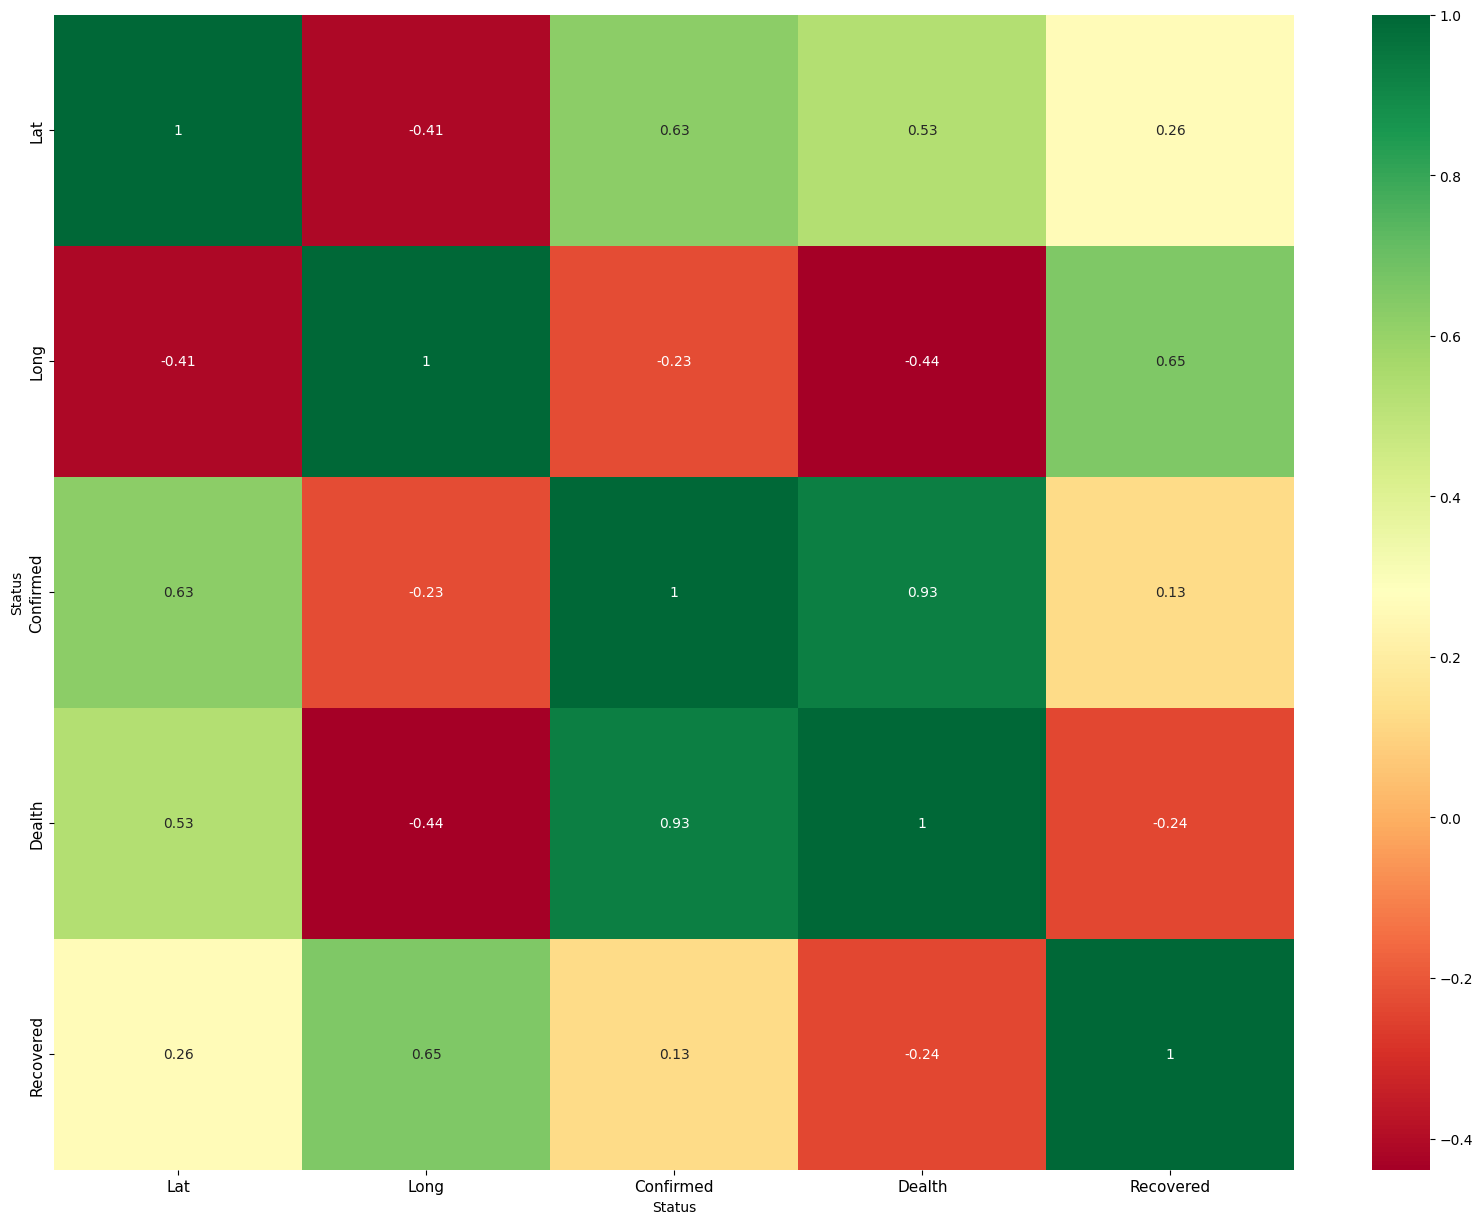

In [87]:
# Heatmap- to find the correlation between independent to independent and independent to dependent variables
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot = True, cmap = "RdYlGn")
plt.tick_params(labelsize=11)

In [130]:
tranformeddata

Status,Province,Country,Lat,Long,Confirmed,Dealth,Recovered
0,Alberta,32,53.9333,-116.5765,6126.057377,110.983607,0.000000
1,Anguilla,178,18.2206,-63.0686,2.168033,0.000000,1.877049
2,Anhui,36,31.8257,117.2264,934.397541,5.504098,864.459016
3,Aruba,122,12.5211,-69.9683,433.922131,3.413934,210.147541
4,Australian Capital Territory,8,-35.4735,149.0124,79.926230,2.077869,71.397541
...,...,...,...,...,...,...,...
267,Western Australia,8,-31.9505,115.8605,439.905738,6.184426,392.344262
268,Xinjiang,36,41.1129,85.2401,253.745902,2.631148,186.868852
269,Yukon,32,64.2823,-135.0000,8.631148,0.000000,0.000000
270,Yunnan,36,24.9740,101.4870,176.881148,1.766393,160.053279


Model creation

In [142]:
# for the model creation we have to separate the independent and dependent
x=tranformeddata.drop(["Country",'Province' ],axis=1)
y=tranformeddata["Country"]

In [137]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [128]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(204, 6)
(204,)
(68, 6)
(68,)


Linear Regression

In [139]:
## importing the model library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

3175.389469357862
49.453207249125796


In [144]:
import math
rmse=math.sqrt(mae)
print(rmse)

7.032297437475593


In [145]:
lr_score=r2_score(y_test,y_pred)
lr_score

-0.004435365912624389

In [146]:
# adjusted r2 score
adj_r2=1-(1-lr_score)*(2671-1)/(2671-13-1)
adj_r2

-0.009349803156457392

KNN

In [147]:
x=tranformeddata.drop(["Country",'Province' ],axis=1)
y=tranformeddata["Country"]

In [148]:
from sklearn.model_selection import train_test_split## splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [149]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [150]:
(y_test!=y_pred).sum()

66

In [151]:
## taking optimal k to determine how many nearest neighbors  to create
# create a list to store the error values for each k
ERROR_RATE=[]
for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [152]:
ERROR_RATE

[0.9264705882352942,
 0.9558823529411765,
 0.9705882352941176,
 0.9705882352941176,
 0.9705882352941176,
 0.9705882352941176,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Error Rate')

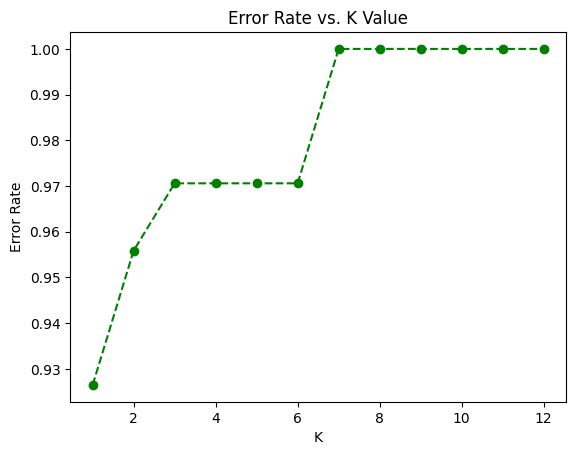

In [153]:
# Lets plot the k-value and error rate
plt.plot(range(1,13),ERROR_RATE,color='green',marker='o',linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [154]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [155]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [156]:
mse=mean_squared_error(y_test,y_pred)
mse

3576.170955882353

In [157]:
mae=mean_absolute_error(y_test,y_pred)
mae

50.919117647058826

In [158]:
knn_score=r2_score(y_test,y_pred)
knn_score

-0.13121008219636887

In [159]:
adj_r2=1-(1-knn_score)*(2671-1)/(2671-13-1)
adj_r2

-0.13674479467982859

Random forest

In [164]:
x=tranformeddata.drop(["Country",'Province' ],axis=1)
y=tranformeddata["Country"]

In [165]:
# Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [166]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [167]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [168]:
#Mean absolute error
MAE=mean_absolute_error(y_test,y_pred)
MAE

44.29014705882353

In [169]:
#Mean Squared error
MSE=mean_squared_error(y_test,y_pred)
MSE

2650.8488426470585

In [170]:
#Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

51.48639473343476

In [171]:
r2=r2_score(y_test,y_pred)
r2

0.16148669228228674

In [172]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.15738406789375448

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11892\3295525070.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




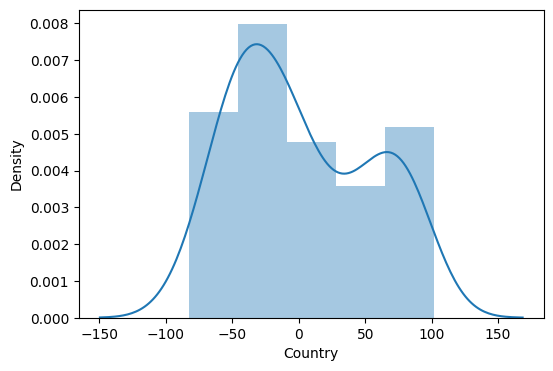

In [173]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

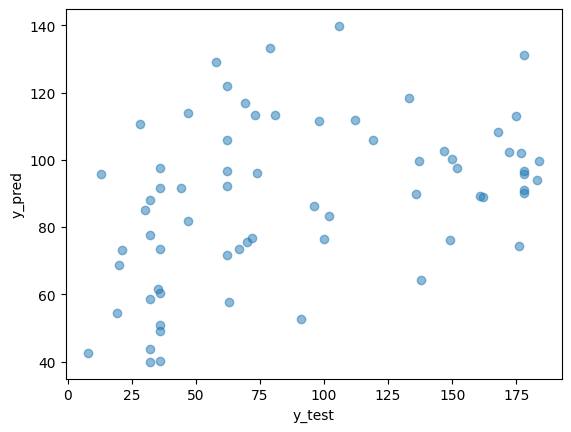

<Figure size 600x400 with 0 Axes>

In [174]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

## HYPER PARAMETERTUNING

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]

In [162]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

In [175]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [176]:
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


128 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [177]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [178]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 500,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 5)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [179]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [180]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

45.81510004348353

In [181]:
MSE=mean_squared_error(y_test,y_pred)
MSE

2811.5485971664175

In [182]:
#Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

53.02403791834811

In [183]:
random_forest.score(x_train,y_train)

0.37489592110159586

In [184]:
random_forest.score(x_test,y_test)

0.11065433981329564

In [186]:
# R2 score
import sklearn.metrics as metrics
rf_score=metrics.r2_score(y_test,y_pred)
rf_score

0.11065433981329564

In [187]:
prediction=rf_random.predict(x_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11892\4163923267.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




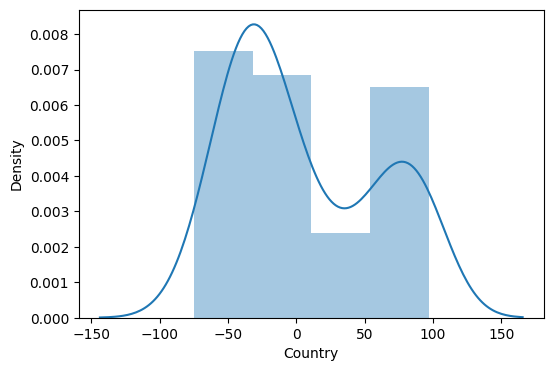

In [188]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-prediction)
plt.show()

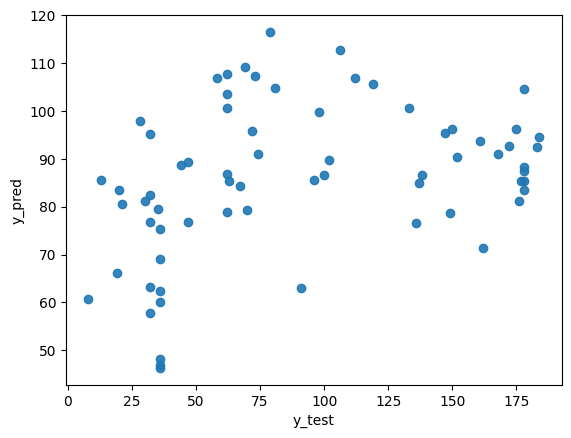

<Figure size 600x400 with 0 Axes>

In [189]:
plt.scatter(y_test, y_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))

plt.show()

## GRADIENT BOOSTING

In [190]:
x=tranformeddata.drop(["Country",'Province' ],axis=1)
y=tranformeddata["Country"]

In [191]:
# Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [192]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100) ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_hat=gbm.predict(x_test)#predicting the price

In [193]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [194]:
mse=mean_squared_error(y_test,y_hat)
mse

3097.078126203017

In [195]:
mae=mean_absolute_error(y_test,y_hat)
mae

47.7013105160964

In [196]:
gb_score=r2_score(y_test,y_hat)
gb_score

0.020335983673274605

In [197]:
adj_r2=1-(1-gb_score)*(2671-1)/(2671-13-1)
adj_r2

0.015542746107505834

## HYPER PARAMETERTUNINIG

In [198]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [200]:
rsc=RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [201]:
rsc.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [202]:
rsc.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'learning_rate': 0.01}

In [203]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor(n_estimators= 300,
                                         min_samples_split= 5,
                                         min_samples_leaf= 4,
                                         subsample=1.0,
                                         learning_rate= 0.01,
                                         max_depth= 3)
gradient_boost.fit(x_train,y_train)
y_hat=gradient_boost.predict(x_test)

In [204]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [205]:
mse=mean_squared_error(y_test,y_hat)
mse

2716.673814667842

In [206]:
mae=mean_absolute_error(y_test,y_hat)
mae

44.53837809891517

In [207]:
gbst_score=r2_score(y_test,y_hat)
gbst_score

0.14066501654899333

Result

In [208]:
scores = [lr_score,knn_score,rf_score,gbst_score]
algorithms = ["Linear Regression","KNN","Random Forest","Gradient Boosting"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Linear Regression is: -0.004435365912624389 %
The R2 score achieved using KNN is: -0.13121008219636887 %
The R2 score achieved using Random Forest is: 0.11065433981329564 %
The R2 score achieved using Gradient Boosting is: 0.14066501654899333 %


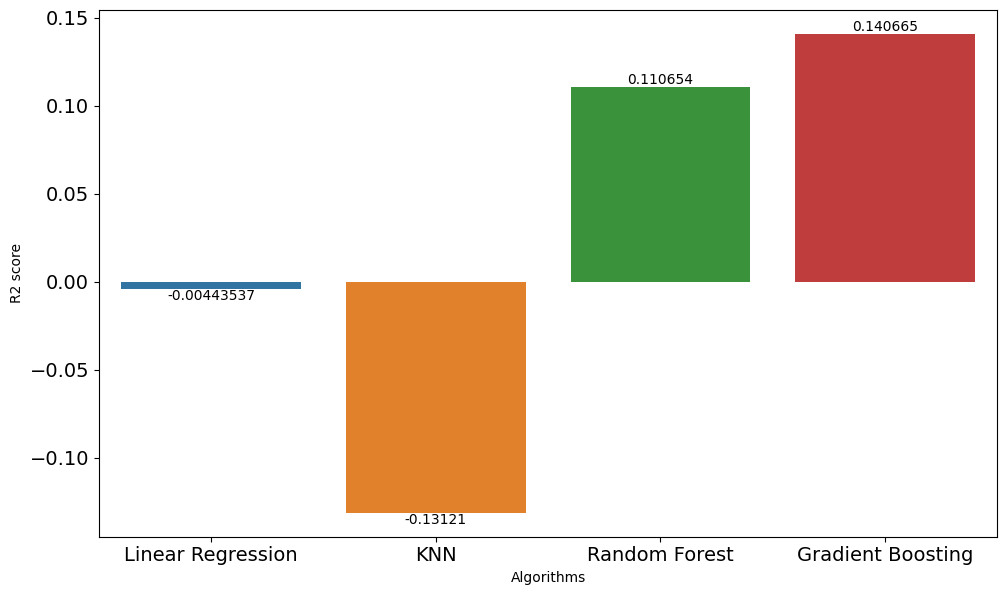

In [209]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

Conclusion
This is a daily updating version of COVID-19 Data Repository by the Center for Systems
Science and Engineering (CSSE) at Johns Hopkins University (JHU). The data updates
every day at 6am UTC, which updates just after the raw JHU data typically updates.
findind which state is imfacted more , in which state more peoples are recovery.

The challenges that we faced during JohnsHopkinsCovid19 using machine learning:


**Feature modeling:** When dealing with a large number of columns or features, finding meaningful correlations between them can be challenging. Correlation analysis helps identify which features are strongly related to the target variable and which are not. However, for a 
large number of columns, this process can become complex and time-consuming.

**Merge all 3 datasets** When dealing with a large number of columns or features, merging data set is difficult.

**creating map** creating a proper map is so much challenging. for this we are  Folium
Folium basically Python's library gives you access to the mapping strengths of the Leaflet JavaScript library through a Python API.